In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from keras.optimizers import Adam
from pickle import dump
import keras
import keras_tuner

np.random.seed(68)

In [2]:
# Import dataset from csv2
group3_dataset = pd.read_csv("student_data.csv")

In [3]:
# Get column names
group3_dataset.columns.values

array(['Student Data', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], dtype=object)

In [4]:
group3_dataset.head(25)

# Actual data starts from 23

,Student Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Independent variables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,First Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Second Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,First Language' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Funding numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,School numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,FastTrack numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Coop numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Residency numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Gender numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Renaming column names
group3_dataset.columns=['First_Term_Gpa','Second_Term_Gpa','First_Language_numeric','Funding_numeric','School_numeric','FastTrack_numeric','Coop_numeric','Residency_numeric','Gender_numeric','Previous_Education_numeric','Age_Group_numeric','High_School_Average_Mark_numeric','Math_Score_numeric','English_Grade_numeric','FirstYearPersistence']

In [6]:
# Dropping first 23 rows
group3_dataset = group4_dataset.drop(group4_dataset.index[range(23)])

In [7]:
columns = group3_dataset.columns.values
for i in columns:
    
    # Replace ? with nan
    group3_dataset.replace({i: {'?': np.nan}}, regex=False,inplace=True)
    
    # Convert dataset to float
    group3_dataset[i] = group3_dataset[i].astype(float)

In [8]:
# Datatype changed to float
group3_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 23 to 1459
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   First_Term_Gpa                    1420 non-null   float64
 1   Second_Term_Gpa                   1277 non-null   float64
 2   First_Language_numeric            1326 non-null   float64
 3   Funding_numeric                   1437 non-null   float64
 4   School_numeric                    1437 non-null   float64
 5   FastTrack_numeric                 1437 non-null   float64
 6   Coop_numeric                      1437 non-null   float64
 7   Residency_numeric                 1437 non-null   float64
 8   Gender_numeric                    1437 non-null   float64
 9   Previous_Education_numeric        1433 non-null   float64
 10  Age_Group_numeric                 1433 non-null   float64
 11  High_School_Average_Mark_numeric  694 non-null    float64
 12  Math_

In [9]:
# Count of null values
print(group3_dataset.isnull().sum())

First_Term_Gpa                       17
Second_Term_Gpa                     160
First_Language_numeric              111
Funding_numeric                       0
School_numeric                        0
FastTrack_numeric                     0
Coop_numeric                          0
Residency_numeric                     0
Gender_numeric                        0
Previous_Education_numeric            4
Age_Group_numeric                     4
High_School_Average_Mark_numeric    743
Math_Score_numeric                  462
English_Grade_numeric                45
FirstYearPersistence                  0
dtype: int64


In [10]:
# Dropping column because of high null value count

group3_dataset =group3_dataset.drop('High_School_Average_Mark_numeric',axis=1)
group3_dataset =group3_dataset.drop('Math_Score_numeric',axis=1)

In [11]:
# Handling missing values for other columns
columns = group3_dataset.columns.values
for i in columns:
    group3_dataset.fillna(value = round(group3_dataset[i].mean()),inplace=True)

In [12]:
group3_dataset.nunique(axis=0)

First_Term_Gpa                692
Second_Term_Gpa               717
First_Language_numeric          3
Funding_numeric                 6
School_numeric                  1
FastTrack_numeric               2
Coop_numeric                    2
Residency_numeric               2
Gender_numeric                  3
Previous_Education_numeric      4
Age_Group_numeric               8
English_Grade_numeric           8
FirstYearPersistence            2
dtype: int64

In [13]:
bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5]

In [14]:
# Convert data into bins for better clasification
group3_dataset['First_Term_Gpa'] = np.searchsorted(bins, group3_dataset['First_Term_Gpa'].values)

In [15]:
group3_dataset['Second_Term_Gpa'] = np.searchsorted(bins, group3_dataset['Second_Term_Gpa'].values)

In [16]:
# After binning
group3_dataset.nunique(axis=0)

First_Term_Gpa                10
Second_Term_Gpa               10
First_Language_numeric         3
Funding_numeric                6
School_numeric                 1
FastTrack_numeric              2
Coop_numeric                   2
Residency_numeric              2
Gender_numeric                 3
Previous_Education_numeric     4
Age_Group_numeric              8
English_Grade_numeric          8
FirstYearPersistence           2
dtype: int64

8    290
7    269
6    223
9    206
5    166
4     92
0     76
3     43
1     38
2     34
Name: First_Term_Gpa, dtype: int64


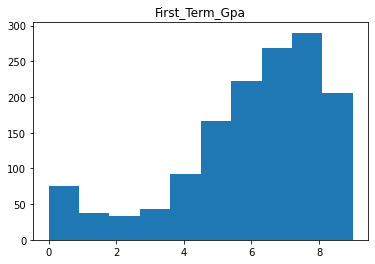

6    377
7    257
8    244
9    152
5    145
4     94
0     72
3     59
2     25
1     12
Name: Second_Term_Gpa, dtype: int64


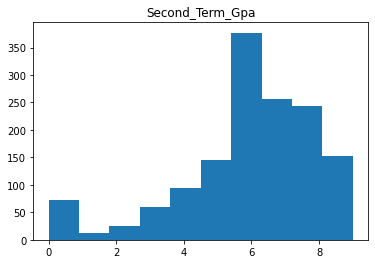

1.0    720
3.0    713
2.0      4
Name: First_Language_numeric, dtype: int64


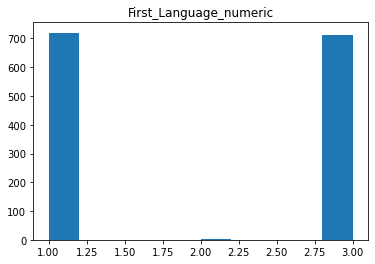

2.0    796
4.0    574
8.0     29
1.0     27
5.0     10
9.0      1
Name: Funding_numeric, dtype: int64


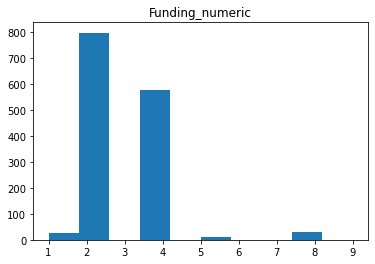

6.0    1437
Name: School_numeric, dtype: int64


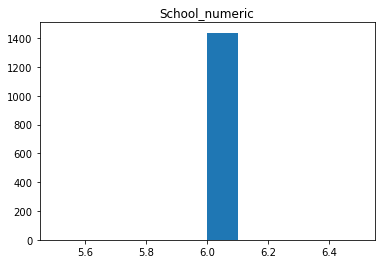

2.0    1066
1.0     371
Name: FastTrack_numeric, dtype: int64


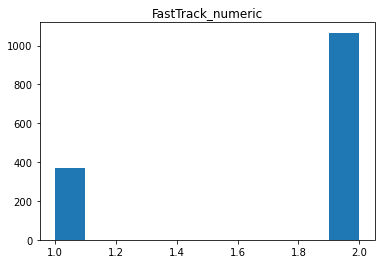

2.0    999
1.0    438
Name: Coop_numeric, dtype: int64


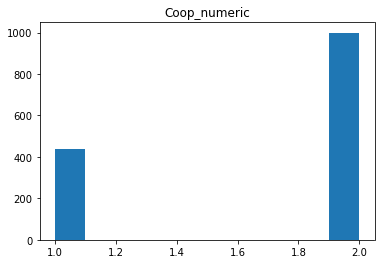

1.0    853
2.0    584
Name: Residency_numeric, dtype: int64


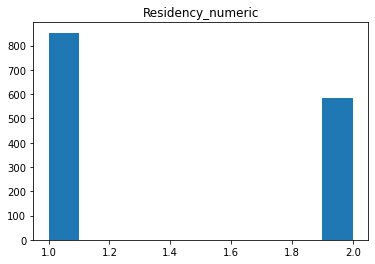

2.0    1111
1.0     325
3.0       1
Name: Gender_numeric, dtype: int64


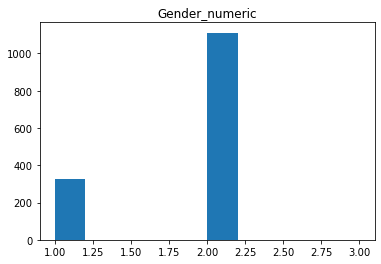

1.0    863
2.0    482
0.0     88
3.0      4
Name: Previous_Education_numeric, dtype: int64


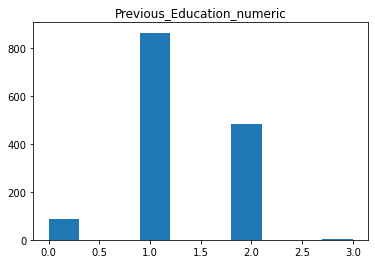

3.0    554
1.0    357
2.0    294
4.0    115
5.0     41
7.0     37
6.0     30
8.0      9
Name: Age_Group_numeric, dtype: int64


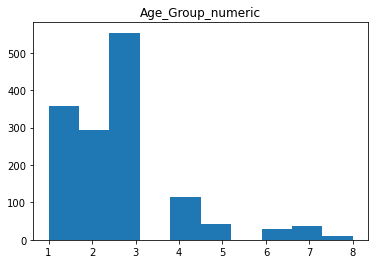

9.0     504
8.0     316
7.0     250
10.0    187
4.0      97
3.0      78
1.0       3
2.0       2
Name: English_Grade_numeric, dtype: int64


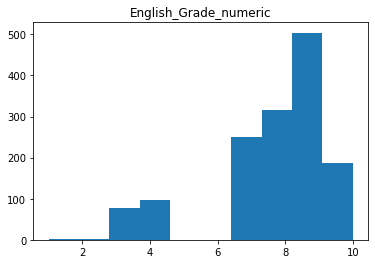

1.0    1138
0.0     299
Name: FirstYearPersistence, dtype: int64


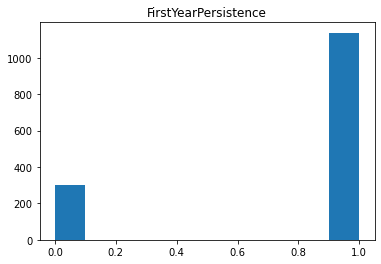

In [17]:
for i in columns:
    print(group3_dataset[i].value_counts())
    plt.hist(group3_dataset[i])
    plt.title(i)
    plt.show()

In [18]:
group3_dataset = group3_dataset[group3_dataset.Gender_numeric != 3]

In [19]:
persistence_0 = group3_dataset[group3_dataset.FirstYearPersistence != 1]
persistence_1 = group3_dataset[group3_dataset.FirstYearPersistence != 0]

In [20]:
# Only 298 labels with persistance 0 against 1138
print(persistence_0.shape)
print(persistence_1.shape)

(298, 13)
(1138, 13)


In [21]:
from sklearn.utils import resample

# Upsample minority class
persistence_0 = resample(persistence_0, 
                                 replace=True,     # sample with replacement
                                 n_samples=1138,random_state=68) # reproducible results

In [22]:
print(persistence_0.shape)
print(persistence_1.shape)

(1138, 13)
(1138, 13)


In [23]:
group3_dataset = pd.concat([persistence_0,persistence_1])
print(group3_dataset.shape)

(2276, 13)


In [24]:
# It is balanced now
print(group3_dataset['FirstYearPersistence'].value_counts())

0.0    1138
1.0    1138
Name: FirstYearPersistence, dtype: int64


In [25]:
corr_matrix = group3_dataset.corr()

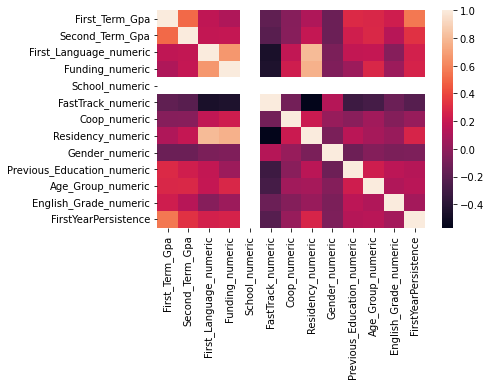

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix)
plt.show()

In [27]:
# Only contains 1 value
group3_dataset['School_numeric'].unique()

array([6.])

In [28]:
group3_dataset =group3_dataset.drop('School_numeric',axis=1)

In [29]:
group3_dataset

,First_Term_Gpa,Second_Term_Gpa,First_Language_numeric,Funding_numeric,FastTrack_numeric,Coop_numeric,Residency_numeric,Gender_numeric,Previous_Education_numeric,Age_Group_numeric,English_Grade_numeric,FirstYearPersistence
1028,1,0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,9.0,0.0
1204,1,0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,9.0,0.0
1226,4,6,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,9.0,0.0
753,6,6,1.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,3.0,0.0
157,2,5,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,8,8,3.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,1.0
1456,9,9,1.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,10.0,1.0
1457,5,5,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,9.0,1.0
1458,9,9,3.0,4.0,2.0,1.0,2.0,1.0,1.0,2.0,8.0,1.0


In [30]:
x = group3_dataset.drop('FirstYearPersistence', axis=1)

In [31]:
y = group3_dataset['FirstYearPersistence']

In [32]:
finalised_dataset = x
finalised_dataset.head()

,First_Term_Gpa,Second_Term_Gpa,First_Language_numeric,Funding_numeric,FastTrack_numeric,Coop_numeric,Residency_numeric,Gender_numeric,Previous_Education_numeric,Age_Group_numeric,English_Grade_numeric
1028,1,0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,9.0
1204,1,0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,9.0
1226,4,6,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,9.0
753,6,6,1.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,3.0
157,2,5,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,7.0


In [33]:
#from sklearn.preprocessing import MinMaxScaler

In [34]:
#scalar = MinMaxScaler()

In [35]:
#finalised_dataset[finalised_dataset.columns] = scalar.fit_transform(finalised_dataset)

In [36]:
from sklearn.model_selection import train_test_split
x_main, x_Test,y_main, y_Test=train_test_split(x,y,test_size=0.20,random_state=68,stratify=y)
x_Train, x_Val, y_Train, y_Val = train_test_split(x_main,y_main,test_size=0.25,random_state=68,stratify=y_main)

In [37]:
print(x_Train.shape)
print(y_Train.shape)
print(x_Val.shape)
print(y_Val.shape)
print(x_Test.shape)
print(y_Test.shape)

(1365, 11)
(1365,)
(455, 11)
(455,)
(456, 11)
(456,)


In [38]:
# Same because of stratified sampling
y_Train.value_counts()

0.0    683
1.0    682
Name: FirstYearPersistence, dtype: int64

In [39]:
x_Train.shape

(1365, 11)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_Train = sc.fit_transform(x_Train)
x_Test = sc.transform(x_Test)
x_Val = sc.transform(x_Val)

In [41]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

tf.random.set_seed(68)

In [42]:
def call_existing_code(units, activation, lr):
    model = keras.Sequential()
    model.add(Dense(units=units, input_shape=(1,11),activation=activation))
    model.add(Dense(units=units, activation=activation))
    model.add(Dense(units=units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='mse',
        metrics=['accuracy'],
    )
    return model

def build_model(hp):
    units = hp.Int('units', min_value=32, max_value=512, step=32)
    units2 = hp.Int('units', min_value=32, max_value=512, step=32)
    activation = hp.Choice('activation', ['relu', 'leaky_relu','linear'])
    lr = hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log')
    model = call_existing_code(
        units=units, activation=activation, lr=lr
    )
    return model

build_model(keras_tuner.HyperParameters())

In [43]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=200,
    seed=68,
    executions_per_trial=1,
    overwrite=True,
)

In [44]:
# x_Train = x_Train.to_numpy()
# x_Test = x_Test.to_numpy()
# x_Val =  x_Val.to_numpy()

x_Train = x_Train.reshape((1365, 1, 11))
x_Test = x_Test.reshape((456, 1, 11))
x_Val =  x_Val.reshape((455, 1, 11))

In [45]:
tuner.search(x_Train,y_Train, epochs=25, validation_data=(x_Val, y_Val))

Trial 200 Complete [00h 00m 04s]
val_accuracy: 0.8285714387893677

Best val_accuracy So Far: 0.894505500793457
Total elapsed time: 00h 14m 20s
INFO:tensorflow:Oracle triggered exit


In [46]:
display(tuner.get_best_hyperparameters()[0].values)

{'units': 288, 'activation': 'relu', 'lr': 0.0012101560484690849}

In [47]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build()
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 288)            3456      
                                                                 
 dense_1 (Dense)             (None, 1, 288)            83232     
                                                                 
 dense_2 (Dense)             (None, 1, 288)            83232     
                                                                 
 dense_3 (Dense)             (None, 1, 1)              289       
                                                                 
Total params: 170,209
Trainable params: 170,209
Non-trainable params: 0
_________________________________________________________________


In [48]:
best_model.evaluate(x_Test,y_Test)

15/15 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.8355


[0.13159482181072235, 0.8355262875556946]

In [49]:
dump(sc, open('scaler.pkl', 'wb'))

In [50]:
best_model.save("model.h5")